### Arash Latifi
### Dec 2022

In [72]:
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import tensorflow.keras.layers as tfl

## Load the Data

In [42]:
(train_X_orig, train_y_orig), (test_X_orig, test_y_orig) = mnist.load_data()

## Normalize Input

In [61]:
train_X = train_X_orig.reshape((train_X_orig.shape[0], 28, 28, 1)).astype('float32')
train_X = train_X/255.
test_X = test_X_orig.reshape((test_X_orig.shape[0], 28, 28, 1)).astype('float32')
test_X = test_X/255.
print ("train_X shape: " + str(train_X.shape))
print ("test_X shape: " + str(test_X.shape))

train_X shape: (60000, 28, 28, 1)
test_X shape: (10000, 28, 28, 1)


## One Hot test data

In [62]:
# train_y = np.zeros((train_y_orig.size, train_y_orig.max() + 1))
# train_y[np.arange(train_y_orig.size), train_y_orig] = 1
# test_y = np.zeros((test_y_orig.size, test_y_orig.max() + 1))
# test_y[np.arange(test_y_orig.size), test_y_orig] = 1

train_y = np_utils.to_categorical(train_y_orig)
test_y = np_utils.to_categorical(test_y_orig)

print ("train_y shape: " + str(train_y.shape))
print ("test_y shape: " + str(test_y.shape))

train_y shape: (60000, 10)
test_y shape: (10000, 10)


## Convolutional Model

In [92]:
# GRADED FUNCTION: convolutional_model

def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tfl.Conv2D(10, 5, activation='linear')(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D()(A1)

    F = tfl.Flatten()(P1)
    outputs = tfl.Dense(10, activation='softmax')(F)
    
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [93]:
conv_model = convolutional_model((28, 28, 1))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 10)        260       
                                                                 
 re_lu_13 (ReLU)             (None, 24, 24, 10)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 12, 12, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1440)              0         
                                                                 
 dense_8 (Dense)             (None, 10)                14410     
                                                           

## Train the Model

In [94]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_X, train_y)).batch(256)
test_dataset = tf.data.Dataset.from_tensor_slices((test_X, test_y)).batch(256)
history = conv_model.fit(train_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5
235/235 [==============================] - 13s 54ms/step - loss: 0.5898 - accuracy: 0.8473 - val_loss: 0.2819 - val_accuracy: 0.9191
Epoch 2/5
235/235 [==============================] - 12s 53ms/step - loss: 0.2609 - accuracy: 0.9258 - val_loss: 0.2074 - val_accuracy: 0.9408
Epoch 3/5
235/235 [==============================] - 13s 53ms/step - loss: 0.1953 - accuracy: 0.9454 - val_loss: 0.1559 - val_accuracy: 0.9546
Epoch 4/5
235/235 [==============================] - 12s 53ms/step - loss: 0.1519 - accuracy: 0.9574 - val_loss: 0.1234 - val_accuracy: 0.9646
Epoch 5/5
235/235 [==============================] - 13s 54ms/step - loss: 0.1238 - accuracy: 0.9661 - val_loss: 0.1029 - val_accuracy: 0.9695


In [95]:
pd.options.mode.chained_assignment = None
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss', 'val_loss']]
df_loss.rename(columns={'loss':'train', 'val_loss':'validation'}, inplace=True)
df_acc= df_loss_acc[['accuracy', 'val_accuracy']]
df_acc.rename(columns={'accuracy':'train', 'val_accuracy':'validation'}, inplace=True)

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

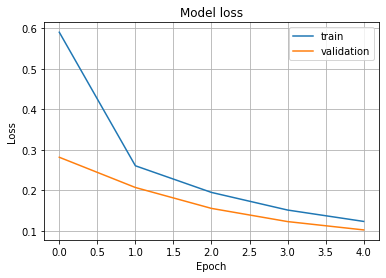

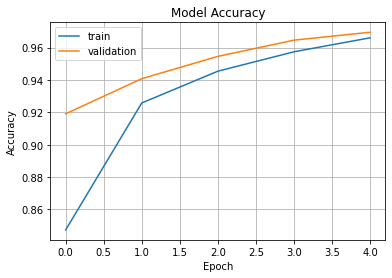

In [96]:
df_loss.plot(title='Model loss', figsize=(6,4), grid=True).set(xlabel='Epoch', ylabel='Loss')
df_acc.plot(title='Model Accuracy', figsize=(6,4), grid=True).set(xlabel='Epoch', ylabel='Accuracy')